# Preprocess 10x 3k PBMC dataset for MC construction

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

## Load data

In [2]:
adata = sc.datasets.pbmc3k()
adata_proc = sc.datasets.pbmc3k_processed()
ad = sc.read_h5ad("data/pbmc3k_processed.h5ad")

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

/Users/mariiabilous/opt/anaconda3/envs/metacells/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/mariiabilous/opt/anaconda3/envs/metacells/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
adata


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [4]:
adata


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [5]:
adata = adata[adata_proc.obs_names].copy()

In [6]:
adata

AnnData object with n_obs × n_vars = 2638 × 32738
    var: 'gene_ids'

In [7]:
adata.obs = adata_proc.obs.copy()
adata.uns = adata_proc.uns.copy()
adata.obsm = adata_proc.obsm.copy()
adata.obsp = adata_proc.obsp.copy()

In [8]:
adata

AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'gene_ids'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

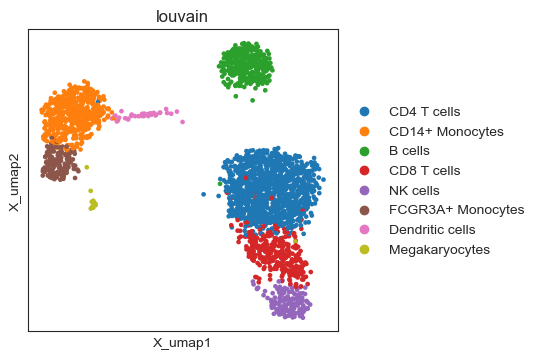

In [9]:
sc.pl.embedding(adata, 'X_umap', color='louvain')

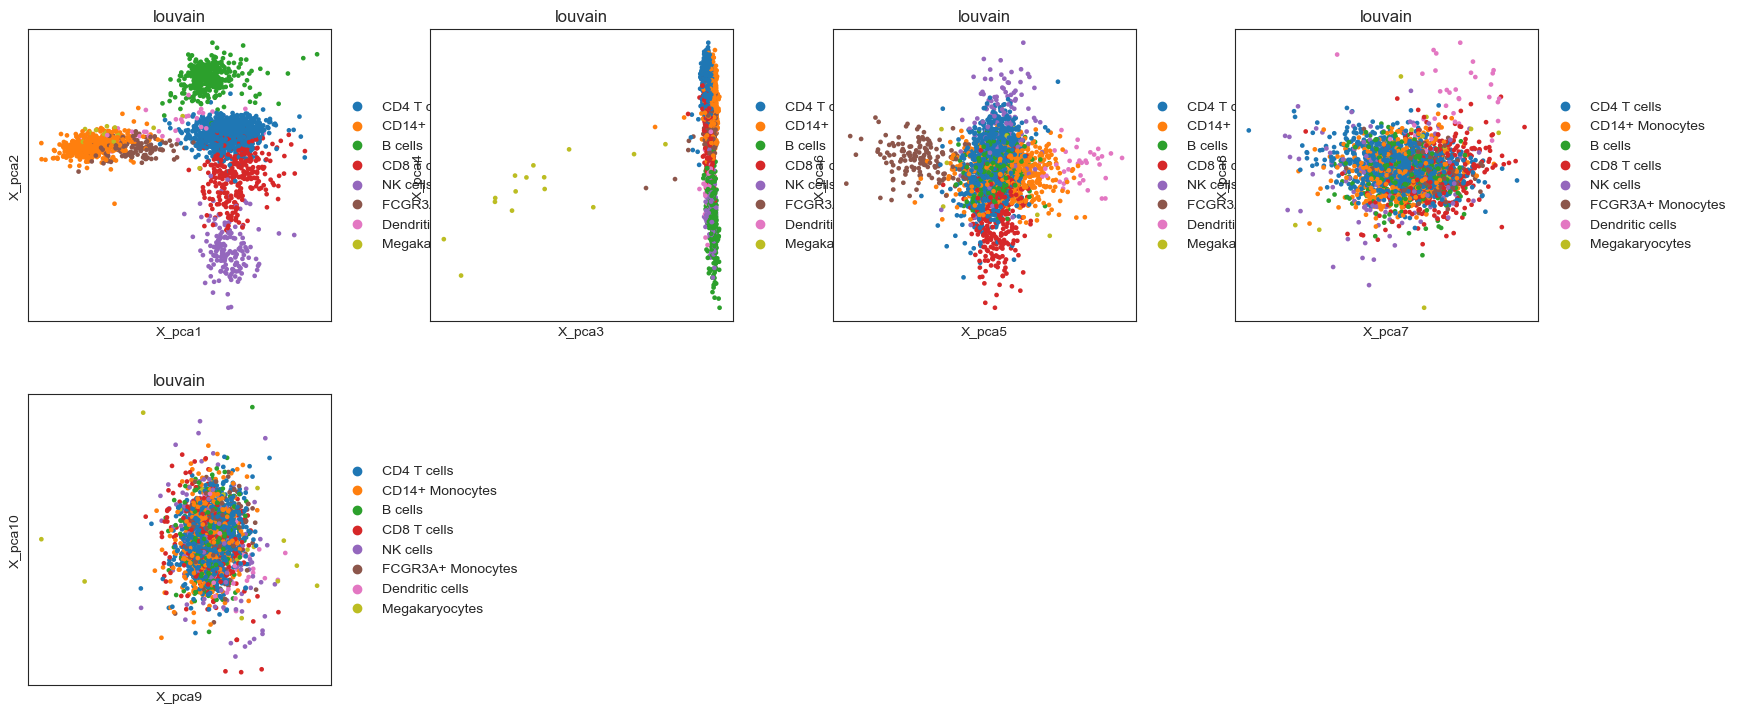

In [10]:
sc.pl.embedding(adata, 'X_pca', color='louvain', components=['1,2', '3,4', '5,6', '7,8', '9,10'])

In [16]:
output_folder = os.path.join("..", "data", "3k_pbmc")
if not os.path.exists(output_folder):
    os.makedirs(output_folder) 

adata.write_h5ad(os.path.join(output_folder, "anndata_filtered.h5ad"))

In [12]:
##Run in R:

#  ad <- anndata::read_h5ad(file.path(data.folder, "anndata_filtered.h5ad"))
#  sc.counts <- ad$X
#  sc.meta <- ad$obs
#  
#  saveRDS(t(sc.counts), file = file.path(data.folder, "sc_counts_filtered.Rds"))
#  saveRDS(sc.meta, file = file.path(data.folder, "sc_meta_filtered.Rds"))